## Poly Regression-Overfiting-Underfiting

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
data = np.array([2, 3, 4]).reshape(-1, 1)

<IPython.core.display.Javascript object>

In [19]:
trans = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
trans.fit(data.reshape(-1, 1)) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

PolynomialFeatures(include_bias=False)

In [21]:
trans.transform(data)

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

In [24]:
trans.fit_transform(data)

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

## Read Dataset

In [7]:
df = pd.read_csv("Advertising.csv")

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Polynomial Converter

In [9]:
X = df.drop("sales", axis =1)
y = df["sales"]

In [10]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [11]:
poly_features = polynomial_converter.fit_transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
poly_features.shape

(200, 9)

In [13]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


## Train | Test Split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

## Model for fitting

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model_poly = LinearRegression()

In [92]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model_poly.predict(X_test)

In [94]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


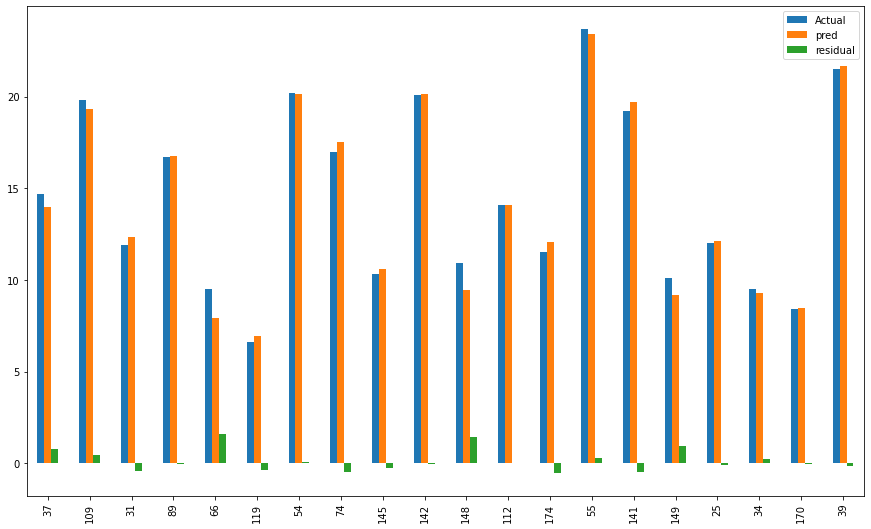

In [95]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [96]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [98]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [99]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

## Evaluation on the Test Set

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [101]:
y_pred = model_poly.predict(X_test)

In [102]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [103]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146795
MAE 		: 0.48967980448035886
MSE 		: 0.44175055104033895
RMSE 		: 0.6646431757269


In [104]:
y_train_pred = model_poly.predict(X_train)

In [105]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.4049248139151435
MSE 		: 0.34569391424440005
RMSE 		: 0.5879574085292234


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

## Let's find optimal degree of poly

In [ ]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors}, index=[i for i in range(1,d)])
        

In [106]:
poly(10)

,train_rmse_errors,test_rmse_errors
1,1.734594,1.516152
2,0.587957,0.664643
3,0.433934,0.580329
4,0.351708,0.507774
5,0.250934,2.575818
6,0.194063,4.305903
7,5.421706,1379.099015
8,0.143205,4212.996760
9,0.172515,95995.414928


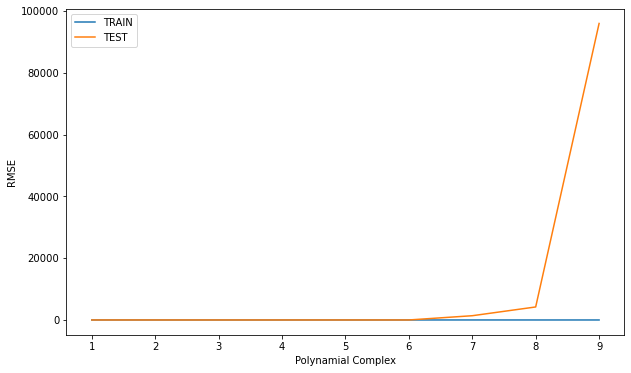

In [107]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

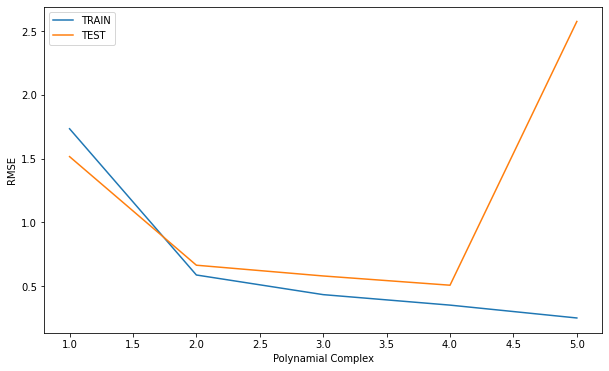

In [108]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

## Finalizing Model Choice

In [109]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [110]:
final_model = LinearRegression()

In [111]:
final_model.fit(final_poly_converter.fit_transform(X) , y)

LinearRegression()

## Predictions

In [112]:
new_record = [[150, 20, 15]]

In [113]:
new_record_poly = final_poly_converter.fit_transform(new_record)

In [114]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [115]:
final_model.predict(new_record_poly) 

array([14.24950844])

## Overfitting

In [116]:
over_poly_converter = PolynomialFeatures(degree =5)

In [117]:
over_model = LinearRegression()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [119]:
over_model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred_over = over_model.predict(X_test)

In [121]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.5764526500016582
MAE 		: 0.7800982257750906
MSE 		: 11.957658199857766
RMSE 		: 3.457984702085561


In [122]:
y_train_over = over_model.predict(X_train)

In [123]:
eval_metric(y_train, y_train_over)

Model testing performance:
--------------------------
R2_score 	: 0.9969950598944347
MAE 		: 0.22001404740143624
MSE 		: 0.07907846989039792
RMSE 		: 0.2812089434751283
